!rm -f SRR003265.filt.fastq.gz 2>/dev/null
! tells Jupyter Notebook to run this as a shell command
rm is the remove/delete command
-f flag means "force" - don't ask for confirmation
SRR003265.filt.fastq.gz is the file to be deleted
2>/dev/null redirects any error messages to null (suppresses them)

!wget -nd ftp://ftp.1000genomes.ebi.ac.uk/vol1/ftp/phase3/data/NA18489/sequence_read/SRR003265.filt.fastq.gz
wget is a command-line utility for downloading files
-nd flag means "no directories" - download directly to current directory
The long URL is the location of the file to download
The file is a FASTQ format (genomics sequencing data) compressed with gzip

In [1]:
!rm -f SRR003265.filt.fastq.gz 2>/dev/null
!wget -nd ftp://ftp.1000genomes.ebi.ac.uk/vol1/ftp/phase3/data/NA18489/sequence_read/SRR003265.filt.fastq.gz

The system cannot find the path specified.
--2025-07-17 13:19:21--  ftp://ftp.1000genomes.ebi.ac.uk/vol1/ftp/phase3/data/NA18489/sequence_read/SRR003265.filt.fastq.gz
           => 'SRR003265.filt.fastq.gz'
Resolving ftp.1000genomes.ebi.ac.uk (ftp.1000genomes.ebi.ac.uk)... 193.62.193.167
Connecting to ftp.1000genomes.ebi.ac.uk (ftp.1000genomes.ebi.ac.uk)|193.62.193.167|:21... connected.
Logging in as anonymous ... Logged in!
==> SYST ... done.    ==> PWD ... done.
==> TYPE I ... done.  ==> CWD (1) /vol1/ftp/phase3/data/NA18489/sequence_read ... done.
==> SIZE SRR003265.filt.fastq.gz ... 28919712
==> PASV ... done.    ==> RETR SRR003265.filt.fastq.gz ... done.
Length: 28919712 (28M) (unauthoritative)

     0K .......... .......... .......... .......... ..........  0% 89.6K 5m15s
    50K .......... .......... .......... .......... ..........  0%  317K 3m21s
   100K .......... .......... .......... .......... ..........  0%  393K 2m38s
   150K .......... .......... .......... .......... .

In [4]:
!pip install biopython

   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   --- ------------------------------------ 0.3/2.8 MB ? eta -:--:--
   ------- -------------------------------- 0.5/2.8 MB 1.1 MB/s eta 0:00:03
   ----------- ---------------------------- 0.8/2.8 MB 1.1 MB/s eta 0:00:02
   -------------- ------------------------- 1.0/2.8 MB 1.1 MB/s eta 0:00:02
   ------------------ --------------------- 1.3/2.8 MB 1.1 MB/s eta 0:00:02
   ------------------ --------------------- 1.3/2.8 MB 1.1 MB/s eta 0:00:02
   ---------------------- ----------------- 1.6/2.8 MB 1.1 MB/s eta 0:00:02
   -------------------------- ------------- 1.8/2.8 MB 1.1 MB/s eta 0:00:01
   ----------------------------- ---------- 2.1/2.8 MB 1.1 MB/s eta 0:00:01
   ----------------------------- ---------- 2.1/2.8 MB 1.1 MB/s eta 0:00:01
   ----------------------------- ---------- 2.1/2.8 MB 1.1 MB/s eta 0:00:01
   ------------------------------

defaultdict: Useful for counting occurrences of items
gzip: For reading compressed FASTQ files
matplotlib/seaborn: For data visualization
Bio.SeqIO: From Biopython, for parsing biological sequence files

Opens the gzipped FASTQ file in text mode ('rt') with UTF-8 encoding
SeqIO.parse() reads the file as a sequence iterator
'fastq' specifies the file format

Gets the first sequence record from the iterator

In [3]:
import gzip
from Bio import SeqIO
recs = SeqIO.parse(gzip.open('SRR003265.filt.fastq.gz','rt', encoding='utf-8'),'fastq')
rec = next(recs)
print(rec)
print(rec.id,'---', rec.name,'---', rec.description,'---', rec.seq)
print(rec.letter_annotations)

from collections import defaultdict
count = defaultdict(int)
for rec in recs:
    for letter in rec:
        count[letter] += 1
print(count.items())
total = sum(count.values())
for letter,cnt in count.items():
    print('%s: %.2f %d' % (letter, cnt/total * 100. ,cnt))

ID: SRR003265.31
Name: SRR003265.31
Description: SRR003265.31 3042NAAXX:3:1:1252:1819 length=51
Number of features: 0
Per letter annotation for: phred_quality
Seq('GGGAAAAGAAAAACAAACAAACAAAAACAAAACACAGAAACAAAAAAACCA')
SRR003265.31 --- SRR003265.31 --- SRR003265.31 3042NAAXX:3:1:1252:1819 length=51 --- GGGAAAAGAAAAACAAACAAACAAAAACAAAACACAGAAACAAAAAAACCA
{'phred_quality': [40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 30, 23, 40, 32, 35, 29, 40, 16, 40, 40, 32, 35, 31, 40, 40, 39, 22, 40, 24, 20, 28, 31, 12, 31, 10, 22, 28, 13, 26, 20, 23, 23]}
dict_items([('G', 5359329), ('A', 7411928), ('T', 7666885), ('C', 5444044), ('N', 37289)])
G: 20.68 5359329
A: 28.60 7411928
T: 29.58 7666885
C: 21.00 5444044
N: 0.14 37289


In [4]:
recs = SeqIO.parse(gzip.open('SRR003265.filt.fastq.gz','rt', encoding='utf-8'),'fastq')
rec = next(recs)
n_count = defaultdict(int)
for rec in recs:
    for pos, base in enumerate(rec.seq, start=1):  # 1-based position
            if base == 'N':
                n_count[pos] += 1
print(n_count.items())

dict_items([(32, 3978), (33, 4662), (34, 3988), (29, 2472), (30, 3108), (31, 4192), (35, 1668), (36, 1006), (51, 1226), (37, 1661), (47, 866), (45, 1145), (49, 423), (28, 1792), (39, 454), (44, 501), (46, 414), (48, 464), (38, 559), (50, 651), (42, 220), (41, 768), (43, 383), (26, 61), (40, 579), (27, 48)])


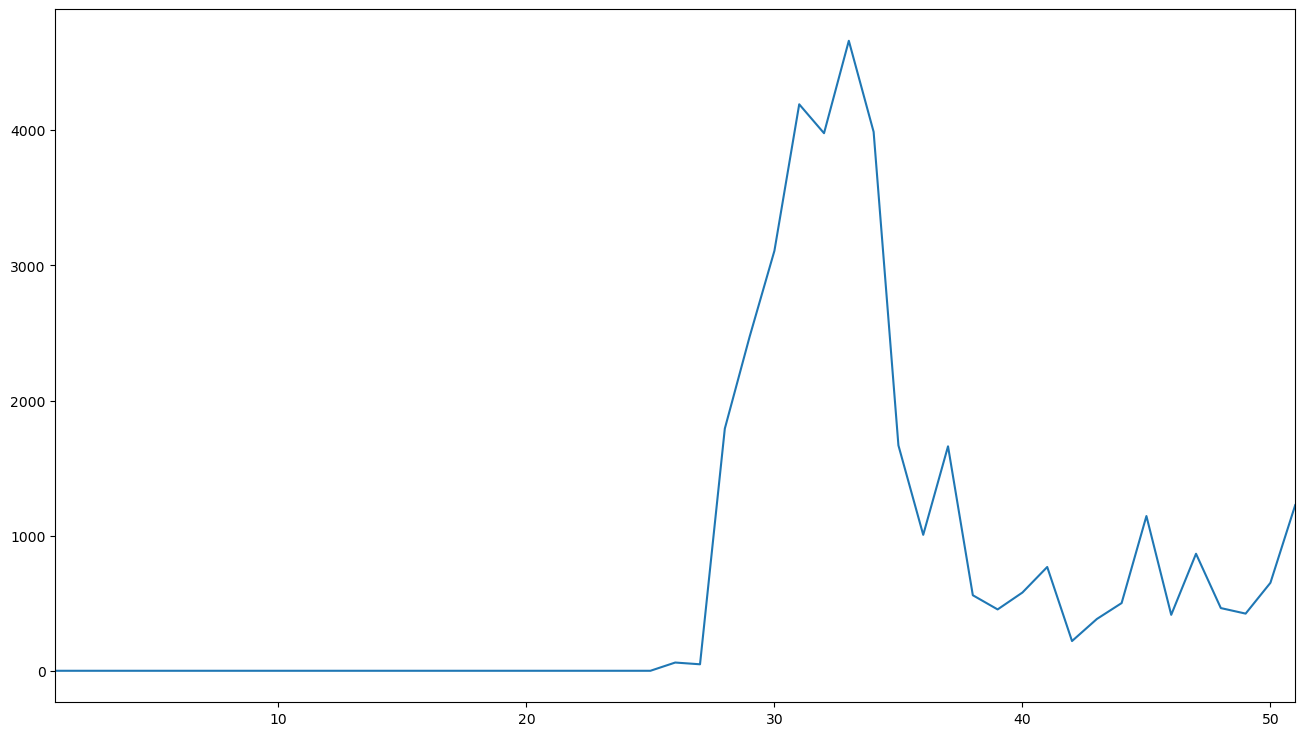

In [5]:
import matplotlib.pyplot as plt
seq_len = max(n_count.keys())
positions = range(1, seq_len + 1)
fig, ax = plt.subplots(figsize=(16,9))
ax.plot(positions, [n_count[x] for x in positions])
ax.set_xlim(1, seq_len)
plt.show()

In [6]:
recs = SeqIO.parse(gzip.open('SRR003265.filt.fastq.gz','rt',encoding='utf-8'),'fastq')
count_quality = defaultdict(int)
for rec in recs:
    for i,qual in enumerate(rec.letter_annotations['phred_quality']):
        if i<25:
            continue
        count_quality[qual] += 1
total = sum(count_quality.values())
for qual,count in count_quality.items():
    print('%d: %.2f %d' % (qual, 100. * count/total, count))

40: 22.76 3007221
16: 2.05 270431
32: 1.03 136763
35: 0.91 120704
31: 1.08 142464
39: 0.78 102568
22: 1.59 209905
24: 1.46 193259
20: 1.73 228923
28: 1.23 162226
12: 2.35 309918
10: 4.95 654154
13: 2.28 301033
26: 1.33 176263
23: 1.52 201164
37: 0.84 111179
34: 0.95 125624
21: 1.66 219602
30: 1.13 149449
33: 0.99 131291
25: 1.40 184846
17: 1.97 259779
38: 0.80 106290
4: 4.77 630923
36: 0.88 115701
18: 1.88 248982
11: 2.41 318303
19: 1.81 239621
5: 4.88 645266
9: 2.51 332259
3: 4.04 533458
27: 1.28 168902
8: 2.53 334410
29: 1.17 154892
15: 2.12 280719
7: 2.51 331743
2: 3.77 498679
14: 2.20 291341
6: 2.50 330834
1: 1.52 200558
0: 0.40 52229


In [ ]:
import seaborn as sns
recs = SeqIO.parse(gzip.open('SRR003265.filt.fastq.gz','rt',encoding='utf-8'),'fastq')
quality_position = defaultdict(list)
for rec in recs:
    for pos, qual in enumerate(rec.letter_annotations['phred_quality'],start=1):
        if pos<25 and qual==40:
            continue
        quality_position[pos].append(qual)
fig, ax = plt.subplots(figsize=(16,9))
sns.boxplot(data=quality_position.values(), ax=ax)
plt.show()

In [ ]:
import seaborn as sns
recs = SeqIO.parse(gzip.open('SRR003265.filt.fastq.gz','rt',encoding='utf-8'),'fastq')
quality_position = defaultdict(list)
for rec in recs:
    for pos, qual in enumerate(rec.letter_annotations['phred_quality'],start=1):
        if pos<25 and qual==40:
            continue
        quality_position[pos].append(qual)
vps = []
poses = quality_position.keys()
for pose in poses:
    vps.append(quality_position[pose])
fig, ax = plt.subplots(figsize=(16,9))
sns.boxplot(data=vps, ax=ax)
ax.set_xticklabels([str(x) for x in range(26, max(qual_pos.keys()) + 1)])
plt.show()